In [ ]:
#pip install --upgrade keras
#!pip install keras-visualizer --upgrade


import keras
print(keras.__version__)


3.8.0


In [ ]:
from keras.datasets import california_housing

In [ ]:
(x_train, y_train), (x_test, y_test) = california_housing.load_data(version="small")

In [ ]:
x_train.shape

(480, 8)

In [ ]:
x_train.shape[1]

8

In [ ]:
y_train.shape

(480,)

In [ ]:
x_test.shape

(120, 8)

In [ ]:
y_test.shape

(120,)

In [ ]:
import keras
print(keras.backend.backend())

tensorflow


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import MeanSquaredError
from keras_visualizer import visualizer



NN
ANN
DNN - Deep NN - Dense NN

In [ ]:
model = Sequential()



In [ ]:
#Hidden Layer 1
model.add(Dense(units = 100, input_shape=(x_train.shape[1],), activation='sigmoid'))
#Hidden Layer 2
model.add(Dense(units = 100, activation='sigmoid'))
#Hidden Layer 3
model.add(Dense(units = 50, activation='sigmoid'))
#Output Layer
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sgd_optimizer = SGD()
mse_loss = MeanSquaredError()

In [ ]:
model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['root_mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,101 (62.89 KB)

 Trainable params: 16,101 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

visualizer(model, file_name='graph', file_format=None, view=False, settings=None)

In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=10, validation_data=(x_test, y_test) ,verbose=1)

Epoch 1/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 16190319616.0000 - root_mean_squared_error: 124670.8828 - val_loss: 10483715072.0000 - val_root_mean_squared_error: 102390.0156
Epoch 2/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10355296256.0000 - root_mean_squared_error: 101644.8516 - val_loss: 10502400000.0000 - val_root_mean_squared_error: 102481.2188
Epoch 3/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11143301120.0000 - root_mean_squared_error: 105532.0547 - val_loss: 10344986624.0000 - val_root_mean_squared_error: 101710.3047
Epoch 4/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10983669760.0000 - root_mean_squared_error: 104544.0625 - val_loss: 10567889920.0000 - val_root_mean_squared_error: 102800.2422
Epoch 5/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10416913408.0000 - root_mean_squared_error: 101985.0625 - val_loss: 10919278592.0000 - val_root_mean_squared_error: 104495.3516
Epoch 6/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121170

In [ ]:
model.evaluate(x_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10117597184.0000 - root_mean_squared_error: 100543.6172


[10379724800.0, 101880.9375]

In [ ]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11648822272.0000 - root_mean_squared_error: 107826.5703 


[10556909568.0, 102746.8203125]

In [ ]:
test_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
model.get_weights()[7].shape

(1,)

In [ ]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 100,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regular

In [ ]:
import matplotlib.pyplot as plt

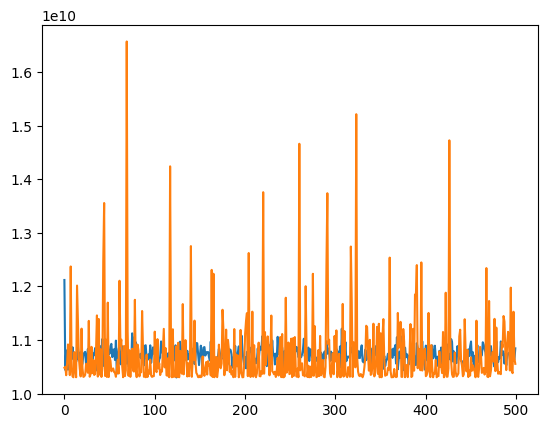

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
history.history

{'loss': [12121225216.0,
  10442785792.0,
  10807334912.0,
  10514791424.0,
  10449233920.0,
  10736389120.0,
  10515139584.0,
  10718222336.0,
  10641665024.0,
  10867781632.0,
  10683900928.0,
  10602544128.0,
  10751182848.0,
  10598104064.0,
  10676878336.0,
  10867376128.0,
  10628679680.0,
  10744578048.0,
  10776468480.0,
  10511339520.0,
  10564320256.0,
  10721765376.0,
  10764565504.0,
  10781680640.0,
  10546790400.0,
  10668311552.0,
  10836104192.0,
  10652107776.0,
  10667429888.0,
  10543385600.0,
  10771577856.0,
  10583439360.0,
  10750622720.0,
  10717060096.0,
  10851023872.0,
  10699540480.0,
  10433856512.0,
  11133481984.0,
  10558600192.0,
  10895354880.0,
  10519871488.0,
  10697094144.0,
  11021193216.0,
  10546649088.0,
  10512991232.0,
  10598158336.0,
  10835462144.0,
  10458528768.0,
  10551918592.0,
  10816234496.0,
  10745582592.0,
  10888547328.0,
  10930314240.0,
  10683198464.0,
  10819408896.0,
  10827614208.0,
  10628487168.0,
  10990453760.0,
  1037